In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

This is already a cleaned dataset, so we can use this only for this practice


In [3]:
data=pd.read_csv("/home/sachingpt/ML-Project/notebook/StudentsPerformance.csv")

In [4]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
data.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [7]:
#print duplicate values
data.duplicated().sum()

np.int64(0)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [ ]:
#Define Numerical and Categorical Columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

# Print Numerical and Categorical Columns
print("Numerical Columns:", numerical_columns)
print("Categorical Columns:", categorical_columns)

Numerical Columns: ['math score', 'reading score', 'writing score']
Categorical Columns: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [11]:
#Adding columns for "Total Score" and "Average Score"
data['Total Score'] = data[numerical_columns].sum(axis=1)
data['Average Score'] = data[numerical_columns].mean(axis=1)
# Display the updated DataFrame with new columns
print(data[['Total Score', 'Average Score']].head())

   Total Score  Average Score
0          218      72.666667
1          247      82.333333
2          278      92.666667
3          148      49.333333
4          229      76.333333


In [13]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score,Average Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [15]:
reading_full=data[data['reading score'] == 100]['Average Score'].count()
writing_full=data[data['writing score'] == 100]['Average Score'].count()
math_full=data[data['math score'] == 100]['Average Score'].count()
print(f"Number of students with full reading score: {reading_full}")
print(f"Number of students with full writing score: {writing_full}")
print(f"Number of students with full math score: {math_full}")

Number of students with full reading score: 17
Number of students with full writing score: 14
Number of students with full math score: 7


In [16]:
reading_less_than_20=data[data['reading score'] < 20]['Average Score'].count()
writing_less_than_20=data[data['writing score'] < 20]['Average Score'].count()
math_less_than_20=data[data['math score'] < 20]['Average Score'].count()
print(f"Number of students with reading score less than 20: {reading_less_than_20}")
print(f"Number of students with writing score less than 20: {writing_less_than_20}")
print(f"Number of students with math score less than 20: {math_less_than_20}")

Number of students with reading score less than 20: 1
Number of students with writing score less than 20: 3
Number of students with math score less than 20: 4


<Axes: xlabel='Average Score', ylabel='Count'>

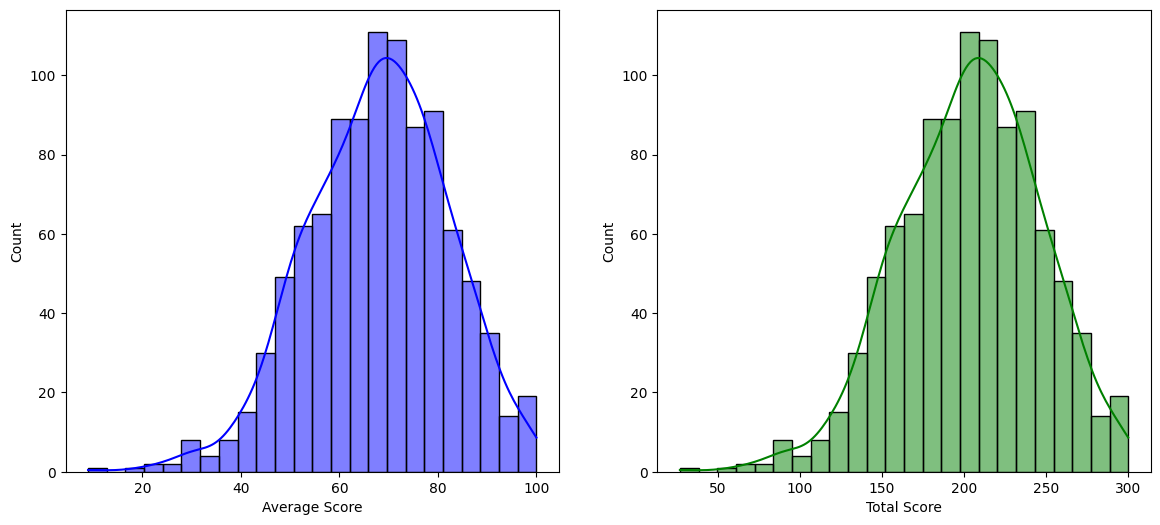

In [29]:
#Histogram and KDE
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
# Histogram and KDE for Total Score
sns.histplot(data['Total Score'], kde=True, ax=axs[1], color='green')
# Histogram and KDE for Average Score 
sns.histplot(data['Average Score'], kde=True, ax=axs[0], color='blue')